# EDA template

## Packages import

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# extras if you want to concatenate nultiple files into a df
import os 
import glob
import re

## Defining useful functions

In [2]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe)
    null_vals = pd.DataFrame(null_vals,columns=['null'])
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3)
    return null_vals.sort_values('percent', ascending=False)

In [146]:
def getDuplicateColumns(df):
    '''
    from: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [ ]:
def  file_to_dataframe(file):
    # this file is transposed of what we expect in a pandas dataframe
    # therefore we import the file and transpose it
    df = pd.read_csv(file,sep="\t",dtype=object,header=None, na_values='nd').T

    # now we can set the header
    header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = header #set the header row as the df header

    return(df)

In [ ]:
def to_float(df,columns):
    """ Function that coverts a list of columns from object data type to float data type"""
    for c in columns:
        df.loc[metadata_short[c]=='na', c]= np.nan
        df[c]=df[c].astype('str').astype('float')
    return df

## Data import

In [4]:
abundance = file_to_dataframe('abundance.txt')

## Data dictionary

The species data has variable names with a pattern like: k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae
|g__Bacteroides|s__Bacteroides_caccae

I have broken down the meaning of each section of the variable name in the table below.

| Section          | Meaning    
| ----------------------- | ------------------- | 
|   k__Bacteria      | Bacteria Kingdom           |              
|p__Bacteroidetes    |  Bacteriodetes Phylum           |    
|    c__Bacteroidia     |  Bacteroidia Class | 
|  f__Bacteroidaceae       | Bacteroidaceae Family     | 
| g__Bacteroides    | Bacteroides Genus              |
| s__Bacteroides_caccae         | Bacteroides caccae Species             | 


The variable:

k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae
|g__Bacteroides|s__Bacteroides_caccae

represents the number of reads for the Bacteroides cacae species for each sample.

## Data inspection

In [7]:
# read first 5 lines
abundance.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
1,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
2,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
3,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
4,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
5,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# read last five lines
abundance.tail()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
3606,Zeller_fecal_colorectal_cancer,CCIS95409808ST-4-0,fr-152,stool,n,63,female,france,Illumina,25432777,...,0,0,0,0,0,0,0,0,0,0
3607,Zeller_fecal_colorectal_cancer,CCIS96387239ST-4-0,fr-626,stool,small_adenoma,66,male,france,Illumina,25432777,...,0,0,0,0,0,0,0,0,0,0
3608,Zeller_fecal_colorectal_cancer,CCIS98482370ST-3-0,fr-052,stool,n,53,female,france,Illumina,25432777,...,0,0,0,0,0,0,0,0,0,0
3609,Zeller_fecal_colorectal_cancer,CCIS98512455ST-4-0,fr-459,stool,cancer,63,male,france,Illumina,25432777,...,0,0,0,0,0,0,0,0,0,0
3610,Zeller_fecal_colorectal_cancer,CCIS98832363ST-4-0,fr-552,stool,cancer,55,female,france,Illumina,25432777,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# number of rows and columns
abundance.shape

print(f'The dataframe has {abundance.shape[0]} rows and {abundance.shape[1]} columns.')

The dataframe has 3610 rows and 3513 columns.


In [10]:
# data types of each column
abundance.dtypes

0
dataset_name                                                                                                                                        object
sampleID                                                                                                                                            object
subjectID                                                                                                                                           object
bodysite                                                                                                                                            object
disease                                                                                                                                             object
                                                                                                                                                     ...  
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococ

In [11]:
# checking if nulls are present
null_vals(abundance)

,null,percent
0,,
mlst_kp,3601,99.751
st_kp,3601,99.751
kit,3593,99.529
sample_group,3593,99.529
illumina_run,3593,99.529
...,...,...
k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhizobiales|f__Bartonellaceae|g__Bartonella|s__Bartonella_unclassified,0,0.000
k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Alcaligenaceae,0,0.000
k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Alcaligenaceae|g__Bordetella,0,0.000


## Data cleaning and exploration

### Handling the dataset (missing values, inconsistencies in naming etc...)

#### 1. First just keep microbes from stool/faeces

In [12]:
abundance.bodysite.value_counts()

stool                       1989
skin                         291
tongue_dorsum                174
supragingival_plaque         162
buccal_mucosa                151
anterior_nares               123
posterior_fornix              78
r_retroauricular_crease       33
l_retroauricular_crease       26
solco_retroauricolare_dx      19
gomito_dx                     17
solco_retroauricolare_sx      17
gomito_sx                     17
subgingival_plaque             8
throat                         7
palatine_tonsils               6
keratinized_gingiva            6
mother_faeces                  6
infant_faeces                  6
saliva                         5
milk                           5
vaginal_introitus              3
mid_vagina                     2
hard_palate                    1
Name: bodysite, dtype: int64

In [13]:
abundance_gut= abundance[(abundance["bodysite"]== 'stool' )|(abundance["bodysite"]== 'mother_faeces' ) \
                               | (abundance["bodysite"]== 'infant_faeces' )]


In [14]:
abundance_gut.shape


(2001, 3513)

#### 2. Pooling together various gut diseases and separating them from controls

In [15]:
abundance_gut.disease.value_counts()


n                             944
t2d                           223
obesity                       164
ibd_ulcerative_colitis        148
cirrhosis                     118
leaness                        89
stec2-positive                 52
impaired_glucose_tolerance     49
cancer                         48
n_relative                     47
small_adenoma                  26
ibd_crohn_disease              25
 -                             20
large_adenoma                  13
overweight                     10
-                               7
obese                           5
underweight                     1
Name: disease, dtype: int64

#### 3. Check what the n_relative could be

steps taken:
- look up the paper (pubmed id)
Sample description.
396 stool samples from 177 Danish and 141 Spanish human individuals were collected (Supplementary Data 1). 124 of the samples were sequenced and used previously2. The Spanish samples included 13 individuals with Crohn's disease and 69 with ulcerative colitis. 77 of the Spanish individuals were sampled twice with, on average, 6 months between the samplings. The Danish samples include healthy individuals ranging in body mass index from 18 to 42.

In [16]:
# unique 'diseases' in disease column of this paper, in spain
abundance_gut[(abundance_gut.pubmedid=='24997787' )| (abundance_gut.country=='spain')].disease.unique()

array(['ibd_ulcerative_colitis', 'n', 'ibd_crohn_disease', 'n_relative'],
      dtype=object)

Based on the literature the n_relative refers to the second time an individual is sampled. Since the individuals are the same, to avoid issues related to the non-independence of the data points we discard the n_relative entries.

In [17]:
# remove n_relative from dataset
abundance_gut= abundance_gut[abundance_gut["disease"] != "n_relative"]

#### 4. Check what the '-' are

In [18]:
abundance_gut[abundance_gut["disease"]=="-"]

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
2900,Tito_subsistence_gut,HCO61,hco61,stool,-,20,female,peru,Illumina,25807110,...,0,0,0,0,0,0,0,0,0,0
2901,Tito_subsistence_gut,HCO64,hco64,stool,-,na,female,peru,Illumina,25807110,...,0,0,0,0,0,0,0,0,0,0
2903,Tito_subsistence_gut,HCO70,hco70,stool,-,40,female,peru,Illumina,25807110,...,0,0,0,0,0,0,0,0,0,0
2928,Tito_subsistence_gut,SM01,sm01,stool,-,30,male,peru,Illumina,25807110,...,0,0,0,0,0,0,0,0,0,0
2931,Tito_subsistence_gut,SM05,sm05,stool,-,1,male,peru,Illumina,25807110,...,0,0,0,0,0,0,0,0,0,0
2937,Tito_subsistence_gut,SM25,sm25,stool,-,2,female,peru,Illumina,25807110,...,0,0,0,0,0,0,0,0,0,0
2948,Tito_subsistence_gut,SM41,sm41,stool,-,6,male,peru,Illumina,25807110,...,0,0,0,0,0,0,0,0,0,0


The rows belong to pubmed id 25807110

In [19]:
subs=abundance_gut[(abundance_gut.pubmedid=='25807110')]

<AxesSubplot:xlabel='disease', ylabel='Count'>

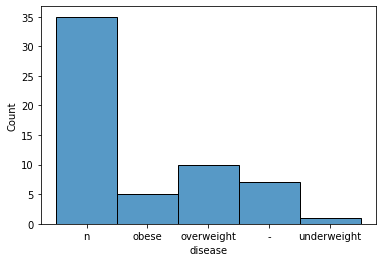

In [20]:
sns.histplot(subs["disease"])

It looks like there is no data for these individuals. I assumed they had no disease since most individals in this study had no disease (histogram above)

In [21]:
# replace '-' with 'n'
abundance_gut["disease"]=abundance_gut["disease"].replace('-','n')

#### 5. Check ot what the " -" is

In [22]:
abundance_gut[abundance_gut["disease"]==" -"]

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
1759,Loman2013_EcoliOutbreak_DNA_HiSeq,OBK2535b,-,stool,-,NaN,NaN,germany,Illumina,23571589,...,0,0,0,0,0,0,0,0,0,0
2975,t2dmeta_long,CON-024,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
2976,t2dmeta_long,CON-025,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
2981,t2dmeta_long,CON-030,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
3045,t2dmeta_long,CON-094,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
3051,t2dmeta_long,CON-100,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
3053,t2dmeta_long,CON-102,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
3054,t2dmeta_long,CON-103,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
3059,t2dmeta_long,CON-108,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0
3060,t2dmeta_long,CON-109,-,stool,-,-,-,-,Illumina,23023125,...,0,0,0,0,0,0,0,0,0,0


There is a lot of data missing here and therefore I decided to exclude these datapoints

In [23]:
# remove n_relative from dataset
abundance_gut= abundance_gut[abundance_gut["disease"] != " -"]

In [24]:
abundance_gut.disease.value_counts()

n                             951
t2d                           223
obesity                       164
ibd_ulcerative_colitis        148
cirrhosis                     118
leaness                        89
stec2-positive                 52
impaired_glucose_tolerance     49
cancer                         48
small_adenoma                  26
ibd_crohn_disease              25
large_adenoma                  13
overweight                     10
obese                           5
underweight                     1
Name: disease, dtype: int64

In [25]:
abundance_gut.dataset_name.value_counts()

Neilsen_genome_assembly              335
Chatelier_gut_obesity                278
t2dmeta_long                         271
Quin_gut_liver_cirrhosis             232
hmp                                  152
WT2D                                 145
Zeller_fecal_colorectal_cancer       134
metahit                              110
t2dmeta_short                         73
Tito_subsistence_gut                  58
hmpii                                 44
Loman2013_EcoliOutbreak_DNA_HiSeq     43
Candela_Africa                        38
VerticalTransmissionPilot             12
Loman2013_EcoliOutbreak_DNA_MiSeq      9
Name: dataset_name, dtype: int64

#### 6. Subdivide dataset into healthy and unhealthy individuals

In [26]:
# if no disease, categorise them as healthy
abundance_gut.loc[abundance_gut['disease'] == 'n', 'is_healthy']= 1
#df.loc[df['c1'] == 'Value', 'c2'] = 10

In [27]:
# replace Nans with 0
abundance_gut.is_healthy.fillna(0, inplace=True)

check number of individuals in each class

In [28]:
abundance_gut.is_healthy.value_counts()

0.0    983
1.0    951
Name: is_healthy, dtype: int64

Good balance between healthy and diseased individuals

In [29]:
abundance_gut.columns

Index(['dataset_name', 'sampleID', 'subjectID', 'bodysite', 'disease', 'age',
       'gender', 'country', 'sequencing_technology', 'pubmedid',
       ...
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis',
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecali

Move 'is_healthy' to another position

In [30]:
temp_cols=abundance_gut.columns.tolist() # list of column names
index=abundance_gut.columns.get_loc("is_healthy") # get index of 'is_healthy' column
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:] # reorder list of columns
abundance_gut=abundance_gut[new_cols] # rearrange the columns based on the new order


#### 7. Removing columns that are not relevant from the data

In [31]:
# divide the abundance data to metadata and species data to make it easy to handle columns
split_index=abundance_gut.columns.get_loc('k__Archaea') 
metadata=abundance_gut.iloc[:,0:split_index]
species=abundance_gut.iloc[:,split_index:]

##### 7.1 Removing columns that have just Nas

In [32]:
#finding the columns with all entries as na 

cols=[]
for c in metadata.columns:
    if metadata[c].isna().sum() != len(metadata):
        cols.append(c)

#deleting the columns with every entry as na
metadata_short =metadata[cols]
metadata_short.shape

print(f'After removing the columns containing no data (filled with Nans) we are left with {metadata_short.shape[1]} columns.')

After removing the columns containing no data (filled with Nans) we are left with 117 columns.


In [33]:
metadata_short.columns

Index(['is_healthy', 'dataset_name', 'sampleID', 'subjectID', 'bodysite',
       'disease', 'age', 'gender', 'country', 'sequencing_technology',
       ...
       'statins', 'insulin', 'oral_anti-diabetic_medication',
       'years_in_sweden', 'tnm_stage', 'ajcc_stage', 'localization', 'fobt',
       'wif-1_gene_methylation_test', 'group'],
      dtype='object', name=0, length=117)

In [34]:
for col in metadata_short.columns: 
    print(col)

is_healthy
dataset_name
sampleID
subjectID
bodysite
disease
age
gender
country
sequencing_technology
pubmedid
camp
paired_end_insert_size
read_length
total_reads
matched_reads
uniquely_matching_reads
uniquely_matched_reads
gene_number
gene_number_for_11m_uniquely_matched_reads
hitchip_probe_number
bmi
gene_count_class
hitchip_probe_class
#SampleID
visit_number
snprnt
wmsphase
first
repeat
stooltexture
daysafteronset
hus
stec_count
shigatoxin2elisa
readsmillions
nonhuman
stec_coverage
stxab_detected
stx_ratio
typingdata
c_difficile_frequency
ibd
sampling_day
known_consumers_of_a_defined_fermented_milk_product_(dfmp)
mgs_richness
mgs_profile_matched_sample_pairs
ethnicity
stage
cirrhotic
hbv_related
alcohol_related
other_causes_related
inr
crea
alb
tb
pt
ascites
he
ctp
meld
antivirus
?-blocker
population
bmi_class
16s_rrna
shotgun_metagenome
read_depth_16s
paired
single
height
weight
diabetic
fbg
sbp
dbp
fins
fcp
hbalc
tg
tcho
hdl
ldl
kit
sample_group
illumina_run
classification
gad-anti

##### 7.2 Removing unnecessary columns from metadata subset

In [35]:
#get rid of more redundant and unnecessary columns in metadata
important =['is_healthy', 'subjectID', 'dataset_name', 'pubmedid',
       'disease', 'age', 'gender', 'country', 'bmi',
         'ethnicity', 'height', 'weight']
metadata_short=metadata_short[important]
print(f'After removing the unnecessary columns, we are left with {metadata_short.shape[1]} columns.')

After removing the unnecessary columns, we are left with 12 columns.


##### 7.3 Removing unnecessary columns from species subset

In [36]:
species.shape

(1934, 3302)

##### 7.4 Checking data types for abundance columns

In [37]:
species['k__Archaea'].dtypes # object data type

dtype('O')

In [38]:
# convert all columns to float datatype
for c in species.columns:
    species[c]=species[c].astype('float64')

In [39]:
# It looks some columns have a maximum abundance of 0, this means that none of the individuals presentent that species
species.max().sort_values().head(5)

0
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Moraxellaceae|g__Acinetobacter|s__Acinetobacter_radioresistens                 0.0
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Agrococcus                                                     0.0
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Agrococcus|s__Agrococcus_pavilionensis                         0.0
k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Capnocytophaga|s__Capnocytophaga_sputigena                     0.0
k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Capnocytophaga|s__Capnocytophaga_sputigena|t__GCF_000173675    0.0
dtype: float64

##### 7.5 Removing columns with all 0s in abundance columns

In [190]:
# finding the columns with max abundance different from 0
# a column with a max entry of zero means it has all zeroes

cols=[]
for c in species.columns:
    if species[c].max() !=0:
        cols.append(c)

#keeping just columns with bacteria species with max abundance > 0
species_short =species[cols]
species_short.shape

print(f'After removing the columns containing all zeros we are left with {species_short.shape[1]} columns.')

After removing the columns containing all zeros we are left with 2115 columns.


##### 7.6 Remove columns that do not have info on the species of bacteria

In [197]:
# subset of the dataframe that contains info on the species
species_short= species_short[species_short.filter(regex='s__').columns]
print(f'After removing the columns that do not contain info on the species, we are left with {species_short.shape[1]} columns.')

After removing the columns that do not contain info on the species, we are left with 1586 columns.


7.7 Remove columns that have identical values from species subset.

In [215]:
duplicate_column_name= species_short.loc[:,j]

In [217]:
duplicate_column_name.shape

(1934, 0)

In [192]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(species_short)

In [218]:
len(duplicateColumnNames)

654

In [219]:
# Delete duplicate columns
species_short_short = species_short.drop(columns=duplicateColumnNames)

In [220]:
species_short_short.shape
print(f'We are now left with {species_short_short.shape[1]} columns after dropping the duplicated ones.')

We are now left with 932 columns after dropping the duplicated ones.


##### 7.7 Checking data types in metadata subset

In [873]:
len(metadata_short.dtypes)

11

In [45]:
# call to_float function on the columns that need conversion to float
metadata_short= to_float(metadata_short, ['age', 'bmi', 'height', 'weight'])

#### 8. Handling nulls in metadata and species subsets

In [874]:
len(null_vals(metadata_short))

11

#### Gender

In [89]:
metadata_short.gender.unique()

array(['female', 'male', '-', nan, 'na'], dtype=object)

Convert all entries where gender is 'na' to null

In [90]:
metadata_short.loc[metadata_short.gender=='na', 'gender']= np.nan

Check why there is a '-' from the paper where those values come from

In [93]:
metadata_short.loc[metadata_short.gender=='-', 'pubmedid'].unique()

array(['23985870'], dtype=object)

there is not info on the sex of the individual subjects but based on Supplementary table 8 included in the paper I found out that 'Whole body fat percentage (%)' is a perfect indicator to distinguish between males and females:
- males have a range of 21 to 31
- females have a range of 33 to 43

Therefore if 'Whole body fat percentage (%)' is less than 32 they are male, else they are females (need to temporarily add this as a column)

Unfourtunately this data was unavailable and I could not retrieve the sex of the participants

In [126]:
metadata_short.loc[metadata_short.gender=='-', 'gender']= np.nan

In [127]:
# gender is not recorded for the WT2D data because it was a study conducted on only women.
# replace all nas with female in WT2D
mask = (metadata_short.dataset_name=="WT2D") & (metadata_short.gender.isna())
metadata_short.loc[mask, 'gender'] = 'female'



In [128]:
# look up the papers where there are still nulls for sex.
metadata_short.loc[metadata_short.gender.isna(), 'pubmedid'].unique()

array(['23985870', '23571589', '25807110', nan], dtype=object)

In [129]:
print('Pubmed ID 23571589 contains no information of the sex of the patients!')

Pubmed ID 23571589 contains no information of the sex of the patients!


#### BMI

In [50]:
# verify if there is height and weight info from columns where bmi is null

ll=metadata_short.loc[metadata_short.bmi.isna(), 'weight']
ll.unique()
print('It looks like there is no info to calculate bmi.')

It looks like there is no info to calculate bmi.


#### Country

In [51]:
# look up the papers where there is no info on country.
metadata_short.loc[metadata_short.country.isna(), 'pubmedid'].unique()

array(['22699609', nan], dtype=object)

In [52]:
# Check if there is ethnicity info
mask = metadata_short.country.isna()
metadata_short.loc[mask, 'ethnicity']
print('It looks like there is no info on ethnicity either.')

It looks like there is no info on ethnicity either.


In [53]:
print('Based on the supplementary info provided by The Human Microbiome Project Consortium (PubMed ID 22699609). \
The samples were obtained in two recruitment centers (Baylor College of Medicine, Houston, TX and Washington University, St. Louis,MO).\
 I therefore assume these individuals come from the USA.')

Based on the supplementary info provided by The Human Microbiome Project Consortium (PubMed ID 22699609). The samples were obtained in two recruitment centers (Baylor College of Medicine, Houston, TX and Washington University, St. Louis,MO). I therefore assume these individuals come from the USA.


In [54]:
mask = ((metadata_short.country.isna()) & (metadata_short.pubmedid =="22699609"))
metadata_short.loc[mask, 'country']= 'usa'

#### Ethnicity

fill up based on country of origin.

In [55]:
metadata_short.ethnicity.unique()

array([nan, 'white', 'unknown'], dtype=object)

In [56]:
print('Given the large amount of missing data and the current values present in this column, we decided to drop this column and keep info just on country of origin.')

Given the large amount of missing data and the current values present in this column, we decided to drop this column and keep info just on country of origin.


In [57]:
metadata_short= metadata_short.drop('ethnicity', axis=1)

#### Disease

In [58]:
metadata_short.disease.unique()

array(['n', 'obesity', 'leaness', 'stec2-positive',
       'ibd_ulcerative_colitis', 'ibd_crohn_disease', 'cirrhosis',
       'obese', 'overweight', 'underweight', 't2d', nan,
       'impaired_glucose_tolerance', 'cancer', 'small_adenoma',
       'large_adenoma'], dtype=object)

In [59]:
mask = metadata_short.disease.isna()
metadata_short.loc[mask, 'dataset_name']
print('All samples with missing information about disease status come from the dataset named "VerticalTransmissionPilot".\
Given the info provided it is likely to be the paper from Ansicar et al., 2017: Studying Vertical Microbiome Transmission from Mothers to Infants by Strain-Level Metagenomic Profiling.')

All samples with missing information about disease status come from the dataset named "VerticalTransmissionPilot".Given the info provided it is likely to be the paper from Ansicar et al., 2017: Studying Vertical Microbiome Transmission from Mothers to Infants by Strain-Level Metagenomic Profiling.


In [60]:
metadata_short.loc[mask]

,is_healthy,subjectID,dataset_name,pubmedid,disease,age,gender,country,bmi,height,weight
3315,0.0,mv_10_(mother_c1),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3316,0.0,mv_11_(infant_d1),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3318,0.0,mv_1_(mother_1),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3319,0.0,mv_2_(infant_1),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3321,0.0,mv_4_(mother_2),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3322,0.0,mv_5_(infant_2),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3324,0.0,mv_7_(mother_3),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3325,0.0,mv_8_(infant_3),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3327,0.0,mv_b2_1_(mother_t1),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3328,0.0,mv_b2_2_(infant_t1),VerticalTransmissionPilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the paper:
1. mother and infant pairs are healthy --> so I change disease to 'n'
1. mother is definitely a female, so can add sex info in the gender column
1. change is healthy to '1'
1. change country to 'Italy': where the study was conducted
1. change 'age' for infant to '0'

In [61]:
# doing point 1.
metadata_short.loc[mask, 'disease']='n'

In [62]:
# doing point 2.
mask1= ( (metadata_short.dataset_name=='VerticalTransmissionPilot') &  (metadata_short['subjectID'].str.contains("mother")) )
metadata_short.loc[mask1, 'gender']='female'

In [63]:
# doing point 3.
mask2= ( (metadata_short.dataset_name=='VerticalTransmissionPilot') & ( metadata_short['disease']=='n') )
metadata_short.loc[mask2, 'is_healthy']=1.0

In [64]:
# doing point 4.
mask3= ( (metadata_short.dataset_name=='VerticalTransmissionPilot') &  (metadata_short['disease']=='n') )
metadata_short.loc[mask3, 'country']='italy'

In [65]:
# doing point 5.
mask4= ( (metadata_short.dataset_name=='VerticalTransmissionPilot') &  (metadata_short['subjectID'].str.contains("infant")) )
metadata_short.loc[mask4, 'age']=0

In [66]:
print('I decided to leave the rest of the null values for the moment.')

I decided to leave the rest of the null values for the moment.


#### 9. Merge together metadata and species into a new, cleaned dataset

In [67]:
metadata_short.shape

(1934, 11)

In [68]:
species_short_short.shape

(1934, 2115)

In [221]:
# concatenate horizontally the two datasets
cleaned= pd.concat([metadata_short, species_short_short], axis=1)

In [222]:
cleaned.shape

(1934, 943)

## Cleaned dataset exploration and narrowing down the scope

In [71]:
cleaned.describe()

,is_healthy,age,bmi,height,weight,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
count,1934.000000,1399.000000,1575.000000,344.000000,344.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,...,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000
mean,0.497932,49.852902,25.694044,163.969477,62.918605,0.671741,0.671741,0.671421,0.671421,0.671421,...,0.000046,0.000027,0.000027,0.000041,0.000041,0.000041,0.000041,0.000483,0.000478,0.000478
std,0.500125,16.098366,5.411155,8.104983,11.494735,2.819283,2.819283,2.818886,2.818886,2.818886,...,0.001091,0.001177,0.001177,0.001822,0.001822,0.001822,0.001822,0.021234,0.021019,0.021019
min,0.000000,0.000000,14.050000,147.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,21.665000,158.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,24.540000,165.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,62.000000,29.285000,170.000000,70.000000,0.111368,0.111368,0.109715,0.109715,0.109715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,46.600000,186.000000,121.500000,49.058170,49.058170,49.058170,49.058170,49.058170,...,0.037560,0.051770,0.051770,0.080130,0.080130,0.080130,0.080130,0.933800,0.924370,0.924370


### 1. Data correlations and Heatmap

In [72]:
# correlations between numerical features in the metadata
metadata_short.corr()

,is_healthy,age,bmi,height,weight
0,,,,,
is_healthy,1.000000,-0.209238,-0.082194,-0.190518,-0.177468
age,-0.209238,1.000000,0.329272,-0.174636,0.059624
bmi,-0.082194,0.329272,1.000000,0.001325,0.832913
height,-0.190518,-0.174636,0.001325,1.000000,0.546859
weight,-0.177468,0.059624,0.832913,0.546859,1.000000


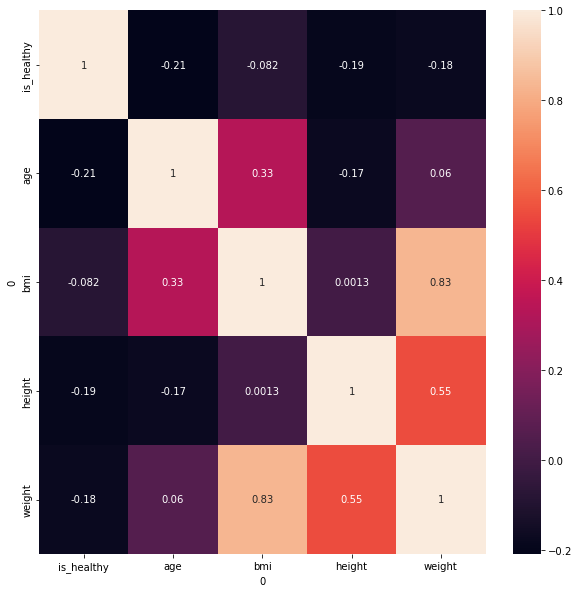

In [73]:
# visualising correlations as heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(metadata_short.corr(), annot = True)

plt.show()

It makes sense seeing correlations between bmi, weight and height as they are derived features.

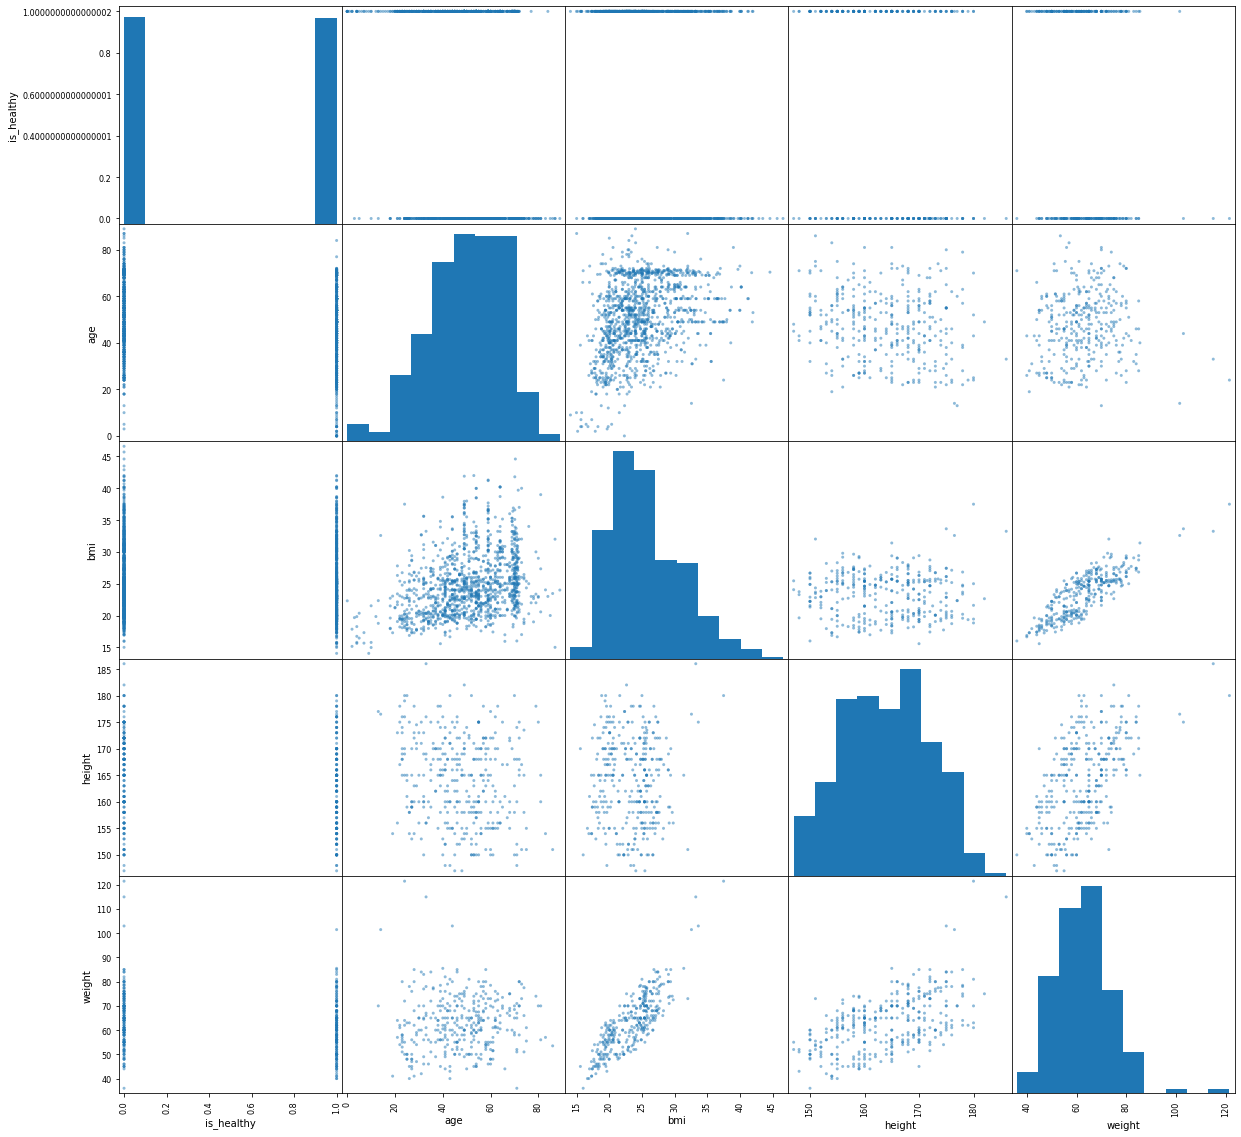

In [74]:
# visualising correlations as scatter matrices
pd.plotting.scatter_matrix(metadata_short, figsize=(20,20))
plt.show()

In [75]:
# correlations between numerical features in the species
species_short.corr()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,,,,,,,,,,,,,,,,,,,,,
k__Archaea,1.000000,1.000000,1.000000,1.000000,1.000000,0.998920,0.997361,0.997361,0.253940,0.293370,...,0.033668,0.028621,0.028621,-0.005412,-0.005412,-0.005412,-0.005412,0.025198,-0.005421,-0.005421
k__Archaea|p__Euryarchaeota,1.000000,1.000000,1.000000,1.000000,1.000000,0.998920,0.997361,0.997361,0.253940,0.293370,...,0.033668,0.028621,0.028621,-0.005412,-0.005412,-0.005412,-0.005412,0.025198,-0.005421,-0.005421
k__Archaea|p__Euryarchaeota|c__Methanobacteria,1.000000,1.000000,1.000000,1.000000,1.000000,0.998921,0.997379,0.997379,0.253628,0.293365,...,0.033678,0.028628,0.028628,-0.005410,-0.005410,-0.005410,-0.005410,0.025204,-0.005419,-0.005419
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,1.000000,1.000000,1.000000,1.000000,1.000000,0.998921,0.997379,0.997379,0.253628,0.293365,...,0.033678,0.028628,0.028628,-0.005410,-0.005410,-0.005410,-0.005410,0.025204,-0.005419,-0.005419
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,1.000000,1.000000,1.000000,1.000000,1.000000,0.998921,0.997379,0.997379,0.253628,0.293365,...,0.033678,0.028628,0.028628,-0.005410,-0.005410,-0.005410,-0.005410,0.025204,-0.005419,-0.005419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,-0.005412,-0.005412,-0.005410,-0.005410,-0.005410,-0.005348,-0.005222,-0.005222,-0.003542,-0.002714,...,-0.000969,-0.000517,-0.000517,1.000000,1.000000,1.000000,1.000000,-0.000517,-0.000517,-0.000517
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,-0.005412,-0.005412,-0.

### 2. Narrowing down the scope: looking at just healthy individuals!

In [223]:
healthy=cleaned[cleaned.is_healthy==1]

In [224]:
healthy.head()

,is_healthy,subjectID,dataset_name,pubmedid,disease,age,gender,country,bmi,height,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacterium|s__Methanobacterium_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_boronitolerans,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1
1,1.0,h10,Candela_Africa,25981789,n,40.0,female,tanzania,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,h11,Candela_Africa,25981789,n,29.0,female,tanzania,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,h12,Candela_Africa,25981789,n,8.0,female,tanzania,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,h13,Candela_Africa,25981789,n,34.0,male,tanzania,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,h14,Candela_Africa,25981789,n,30.0,male,tanzania,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Exploratory plots

Questions I want to find an answer for:
1. Does microbiome composition change between different sexes? --> look at the most abundant bacteria in each sex
1. Does microbiome composition change in healthy individuals between different locations? --> look at the most common bacteria groups in each country


In [225]:
all_col=healthy.columns

In [229]:
# create a list of all columns containing bacteria info
all_bac=all_col[11:]

#### 3.1 SEX AND MICROBIOME

In [298]:
h=healthy.groupby('gender')[all_bac].mean()

In [299]:
h1=h.iloc[[0]].sort_values(by='female',axis=1, ascending=False).reset_index(drop=True)
h2=h.iloc[[1]].sort_values(by='male',axis=1, ascending=False).reset_index(drop=True)

In [300]:
h1.rename(index={0:"abundance_f"}, inplace=True)
h2.rename(index={0:"abundance_m"}, inplace=True)

In [301]:
h1=h1.transpose()
h2=h2.transpose()

In [302]:
h1['bac_species']=h1.index
h2['bac_species']=h2.index

In [303]:
h1=h1.reset_index(drop=True)
h2=h2.reset_index(drop=True)

All together into 1 df

In [304]:
result = pd.merge(h1, h2, on='bac_species')

In [307]:
result=result[['bac_species','abundance_f', 'abundance_m']]

In [308]:
# absolute difference in mean abundance between male and female
result['diff']= abs(result['abundance_f']-result['abundance_m'])

/var/folders/tc/04z8ljjx39b5s_f2y8lrj92c0000gn/T/ipykernel_20347/1802004517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['diff']= abs(result['abundance_f']-result['abundance_m'])


In [309]:
result_diff=result.sort_values(by='diff', ascending=False).head(10)

In [311]:
result_diff

,bac_species,abundance_f,abundance_m,diff
2,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,5.437890,8.465209,3.027318
0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,6.445878,4.668130,1.777748
31,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,1.393175,3.094380,1.701204
29,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,1.419905,2.699966,1.280061
14,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,2.355746,3.310734,0.954987
5,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,4.657989,5.507508,0.849519
7,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,4.359672,3.516468,0.843204
6,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,4.575110,3.752517,0.822593
52,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.752571,1.568589,0.816018
19,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...,1.785175,1.029127,0.756048


In [349]:
matches=[]
for i in result_diff['bac_species']:
    s=re.search('s__\w+', i)
    k=s.group(0) #extract what was captured
    matches.append(k)

In [350]:
matches

['s__Prevotella_copri',
 's__Subdoligranulum_unclassified',
 's__Bacteroides_massiliensis',
 's__Butyrivibrio_crossotus',
 's__Bacteroides_ovatus',
 's__Faecalibacterium_prausnitzii',
 's__Bacteroides_uniformis',
 's__Bacteroides_uniformis',
 's__Prevotella_stercorea',
 's__Escherichia_coli']

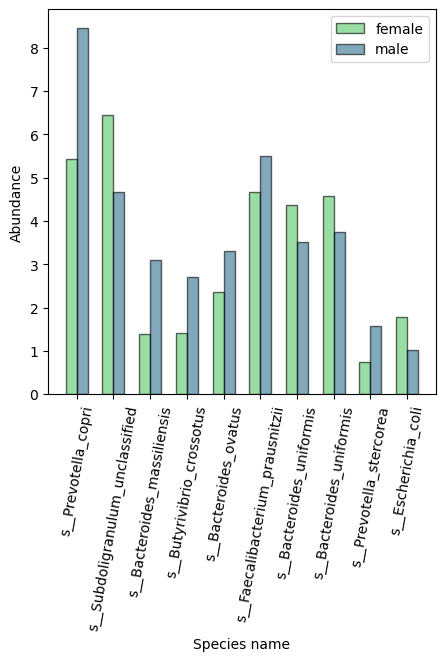

In [909]:
# Numbers of pairs of bars you want
N = 10

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = result_diff.abundance_f
# Specify the values of orange bars (height)
pink_bar = result_diff.abundance_m

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(5,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='female', color='#56c667', alpha=0.6, edgecolor='black')
plt.bar(ind + width, orange_bar, width, label='male', color='#2d718e', alpha=0.6, edgecolor='black')

plt.ylabel('Abundance')
plt.xlabel('Species name')
#plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations

plt.xticks(ind + width / 2, ('s__Prevotella_copri',
 's__Subdoligranulum_unclassified',
 's__Bacteroides_massiliensis',
 's__Butyrivibrio_crossotus',
 's__Bacteroides_ovatus',
 's__Faecalibacterium_prausnitzii',
 's__Bacteroides_uniformis',
 's__Bacteroides_uniformis',
 's__Prevotella_stercorea',
 's__Escherichia_coli'), rotation=80)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### 3.2 COUNTRY AND MICROBIOME

In [680]:
healthy.country.value_counts()

china       288
denmark     259
usa         210
france       48
sweden       39
spain        38
peru         28
tanzania     27
italy        23
germany       2
iceland       1
Name: country, dtype: int64

Drop Germany and Iceland as there is not much data

In [681]:
h_country=healthy.loc[(healthy.country != 'germany' ) & (healthy.country != 'iceland') ]

In [682]:
h_country.country.value_counts()

china       288
denmark     259
usa         210
france       48
sweden       39
spain        38
peru         28
tanzania     27
italy        23
Name: country, dtype: int64

##### Remove duplicate subjectIDs

In [684]:
# sorting by first name
h_country.sort_values("subjectID", inplace = True)
 
# dropping ALL duplicate values
h_country.drop_duplicates(subset ="subjectID",
                     keep = 'last', inplace = True)

/Users/madda/miniforge3/envs/ds/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [685]:
h_country

,is_healthy,subjectID,dataset_name,pubmedid,disease,age,gender,country,bmi,height,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacterium|s__Methanobacterium_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_boronitolerans,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1
1200,1.0,158256496,hmp,22699609,n,NaN,female,usa,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,1.0,158337416,hmp,22699609,n,NaN,female,usa,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658,1.0,158357646,hmpii,22699609,n,NaN,male,usa,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,1.0,158458797,hmp,22699609,n,NaN,female,usa,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,1.0,158479027,hmp,22699609,n,NaN,male,usa,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,1.0,v1_uc_19,metahit,20203603,n,37.0,female,spain,21.19,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1915,1.0,v1_uc_6,metahit,20203603,n,38.0,female,spain,23.18,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1916,1.0,v1_uc_7,metahit,20203603,n,19.0,female,spain,23.05,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1917,1.0,v1_uc_8,metahit,20203603,n,22.0,male,spain,25.40,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Transposing dataset and visualising it: Does microbiome composition change between different countries?

In [686]:
c=h_country.groupby('country')[all_bac].mean()

In [687]:
c=c.transpose().reset_index()

In [688]:
c=c.rename(columns={0:'bac_species'})

In [689]:
c.columns

Index(['bac_species', 'china', 'denmark', 'france', 'italy', 'peru', 'spain',
       'sweden', 'tanzania', 'usa'],
      dtype='object', name='country')

In [690]:
c['avg_abundance']= c[['china', 'denmark', 'france', 'italy', 'peru', 'spain',
       'sweden', 'tanzania', 'usa']].mean(axis=1)

In [691]:
c_short=c.sort_values('avg_abundance', ascending=False).head(15)

In [692]:
c_short

country,bac_species,china,denmark,france,italy,peru,spain,sweden,tanzania,usa,avg_abundance
193,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,8.538027,3.681748,4.886558,6.678141,23.120235,5.657755,9.350869,14.770417,3.716507,8.933362
84,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,9.192836,7.357559,2.307462,5.403200,11.047903,4.409490,0.416918,23.494146,3.295518,7.436115
194,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,7.000568,2.505163,2.979733,5.728780,21.670625,3.316704,6.285106,14.214490,2.388624,7.343310
206,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,1.520866,11.099354,5.075384,6.887757,1.847933,8.274974,10.342709,3.925409,4.171781,5.905130
150,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,2.903176,5.742791,5.726770,5.785807,2.765854,6.358243,7.786066,8.299186,4.021286,5.487687
151,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,2.903176,5.742791,5.726770,5.785807,2.765854,6.358243,7.786066,8.299186,4.009266,5.486351
199,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,1.551402,2.636612,8.245758,2.160546,4.136774,4.280933,6.409386,1.740800,2.460276,3.735832
58,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,3.285682,4.962280,2.691634,2.002102,0.069937,4.084335,1.913795,0.002710,6.769455,2.864659
261,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...,2.027753,0.821689,1.481912,8.623311,1.922243,0.754506,4.448600,4.024564,0.885203,2.776642
59,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,3.273033,4.533505,2.588043,1.828605,0.069937,3.855437,1.913795,0.002710,6.213828,2.697655


In [693]:
matches=[]
for i in c_short['bac_species']:
    s=re.search('s__\w+', i)
    k=s.group(0) #extract what was captured
    matches.append(k)

In [694]:
c_short['species_name']=matches

In [695]:
matches

['s__Faecalibacterium_prausnitzii',
 's__Prevotella_copri',
 's__Faecalibacterium_prausnitzii',
 's__Subdoligranulum_unclassified',
 's__Eubacterium_rectale',
 's__Eubacterium_rectale',
 's__Ruminococcus_bromii',
 's__Bacteroides_uniformis',
 's__Escherichia_coli',
 's__Bacteroides_uniformis',
 's__Bacteroides_vulgatus',
 's__Bacteroides_vulgatus',
 's__Butyrivibrio_crossotus',
 's__Phascolarctobacterium_succinatutens',
 's__Alistipes_putredinis']

In [696]:
c_short.china

193    8.538027
84     9.192836
194    7.000568
206    1.520866
150    2.903176
151    2.903176
199    1.551402
58     3.285682
261    2.027753
59     3.273033
61     4.482371
62     4.482371
162    0.137807
224    0.255882
91     3.502066
Name: china, dtype: float64

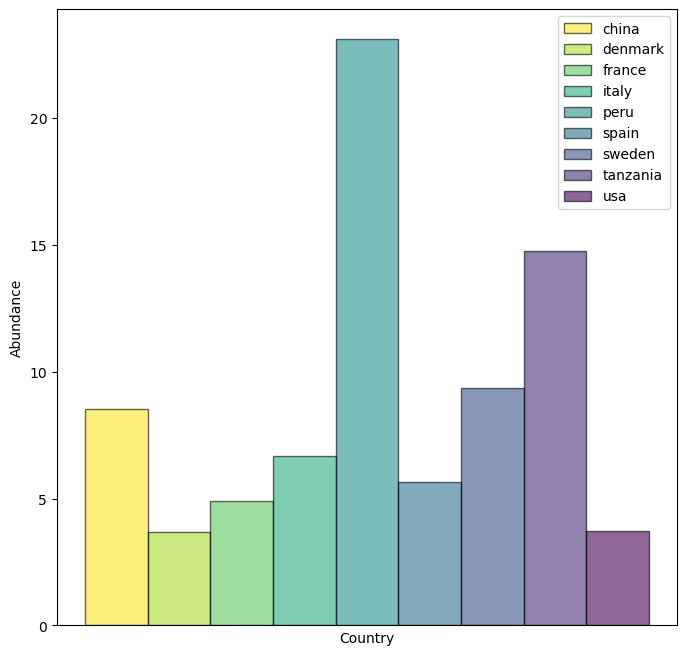

In [902]:
# Numbers of pairs of bars you want
N = 1

# Data on X-axis

# Specify the values of blue bars (height)
b1 = c_short.china.iloc[0]
b2= c_short.denmark.iloc[0]
b3= c_short.france.iloc[0]
b4= c_short.italy.iloc[0]
b5= c_short.peru.iloc[0]
b6= c_short.spain.iloc[0]
b7= c_short.sweden.iloc[0]
b8= c_short.tanzania.iloc[0]
b9= c_short.usa.iloc[0]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(8,8))
plt.style.use(['default'])
# Width of a bar 
width = 0.3       

# Plotting

plt.bar(ind, b1 , width, label='china', color='#fde725', alpha=.6, edgecolor='black')
plt.bar(ind + width, b2, width, label='denmark', color='#addc30', alpha=.6, edgecolor='black')
plt.bar(ind + width +width, b3, width, label='france', color='#5ec962', alpha=.6, edgecolor='black')
plt.bar(ind + width*3, b4, width, label='italy', color='#28ae80', alpha=.6, edgecolor='black')
plt.bar(ind + width*4, b5, width, label='peru', color='#21918c', alpha=.6, edgecolor='black')
plt.bar(ind + width*5, b6, width, label='spain', color='#2c728e', alpha=.6, edgecolor='black')
plt.bar(ind + width*6, b7, width, label='sweden', color='#3b528b', alpha=.6, edgecolor='black')
plt.bar(ind + width*7, b8, width, label='tanzania', color='#472d7b', alpha=.6, edgecolor='black')
plt.bar(ind + width*8, b9, width, label='usa', color='#440154', alpha=.6, edgecolor='black')

plt.ylabel('Abundance')
plt.xlabel('Country')
#plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

Abudance changes a lot between countries!!

### 4. Change df format

#### I want the format of the dataset to be the following:
subjectID-age-gender-country-species-abundance

In [708]:
new_df= h_country.drop(['is_healthy', 'dataset_name', 'pubmedid','height','weight', 'bmi', 'disease'], axis=1)

In [709]:
new_df.columns

Index(['subjectID', 'age', 'gender', 'country',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis',
       ...
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f

In [710]:
new_df

,subjectID,age,gender,country,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacterium|s__Methanobacterium_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_boronitolerans,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1
1200,158256496,NaN,female,usa,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,158337416,NaN,female,usa,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658,158357646,NaN,male,usa,0.01624,0.01724,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,158458797,NaN,female,usa,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,158479027,NaN,male,usa,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,v1_uc_19,37.0,female,spain,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1915,v1_uc_6,38.0,female,spain,0.00740,0.00173,0.0,0.00066,0.00391,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1916,v1_uc_7,19.0,female,spain,0.00000,0.00000,0.0,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1917,v1_uc_8,22.0,male,spain,3.31629,0.08262,0.0,0.00373,0.00274,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [711]:
# unpivot the table
new_df=pd.melt(new_df, id_vars =['subjectID', 'age', 'gender', 'country'], var_name ='species', value_name ='abundance')

### 5. Investigating species abundance changes between countries

In [712]:
new_df['species_name'] = (new_df.species.str
                             .findall('s__\w+')
                             .str[0])

In [713]:
new_df

,subjectID,age,gender,country,species,abundance,species_name
0,158256496,NaN,female,usa,k__Archaea|p__Euryarchaeota|c__Methanobacteria...,0.00000,s__Methanobrevibacter_smithii
1,158337416,NaN,female,usa,k__Archaea|p__Euryarchaeota|c__Methanobacteria...,0.00000,s__Methanobrevibacter_smithii
2,158357646,NaN,male,usa,k__Archaea|p__Euryarchaeota|c__Methanobacteria...,0.01624,s__Methanobrevibacter_smithii
3,158458797,NaN,female,usa,k__Archaea|p__Euryarchaeota|c__Methanobacteria...,0.00000,s__Methanobrevibacter_smithii
4,158479027,NaN,male,usa,k__Archaea|p__Euryarchaeota|c__Methanobacteria...,0.00000,s__Methanobrevibacter_smithii
...,...,...,...,...,...,...,...
722295,v1_uc_19,37.0,female,spain,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...,0.00000,s__Megasphaera_sp_BV3C16_1
722296,v1_uc_6,38.0,female,spain,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...,0.00000,s__Megasphaera_sp_BV3C16_1
722297,v1_uc_7,19.0,female,spain,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...,0.00000,s__Megasphaera_sp_BV3C16_1
722298,v1_uc_8,22.0,male,spain,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...,0.00000,s__Megasphaera_sp_BV3C16_1


#### 5.1 Remove entries were abundance is less then 0.1 as these microbes are present in very small amounts

In [714]:
new_df=new_df.loc[new_df.abundance >= 0.1,]

Average number of different identified bacteria in each individual

In [715]:
new_df.groupby(['country', 'subjectID'])[['species_name']].count().sort_values('species_name',ascending=False)['species_name'].mean()

56.83741935483871

#### 5.2 Keep only more abundant bacteria

Since, on average each 70 different bacteria species have been identified in each individual, we can keep just the top 70 bacteria in each country by median abundance

array([[<AxesSubplot:title={'center':'abundance'}>]], dtype=object)

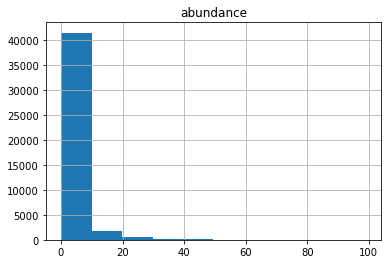

In [716]:
new_df.hist(column="abundance")

Since the distribution of abundance is quite skewed, I used median as measure of central tendency

In [717]:
final=pd.DataFrame(columns = ['country','species_name','abundance'])

for country in new_df.country.unique():
    top_70 = (
        new_df[new_df['country'] == country]
        .groupby('species_name')[['abundance']].median()
        .sort_values('abundance', ascending=False)
       .head(70)
        .reset_index()
    )
    top_70['country']= country
    final= pd.concat([top_70, final])

final.country.unique()


array(['sweden', 'spain', 'denmark', 'italy', 'peru', 'tanzania',
       'france', 'china', 'usa'], dtype=object)

In [718]:
final

,species_name,abundance,country
0,s__Subdoligranulum_unclassified,8.106900,sweden
1,s__Ruminococcus_bromii,7.010260,sweden
2,s__Streptococcus_lutetiensis,5.740350,sweden
3,s__Eubacterium_rectale,4.385795,sweden
4,s__Faecalibacterium_prausnitzii,4.273565,sweden
...,...,...,...
65,s__Streptococcus_sp_AS14,1.304050,usa
66,s__Bacteroides_gallinarum,1.297270,usa
67,s__Megamonas_hypermegale,1.285290,usa
68,s__Coprococcus_eutactus,1.268830,usa


#### 5.3 Compare top 3 in each country

In [719]:
top_3=pd.DataFrame(columns = ['country','species_name','abundance'])

for country in final.country.unique():
    top3 = (
        final[final['country'] == country].head(3)
    )
    top_3= pd.concat([top3, top_3])

top_3

,species_name,abundance,country
0,s__Prevotella_buccae,31.461740,usa
1,s__Pseudomonas_syringae,19.156250,usa
2,s__Bacteroides_sp_1_1_30,12.554115,usa
0,s__Bifidobacterium_breve,13.774750,china
1,s__Prevotella_copri,13.360540,china
2,s__Prevotella_stercorea,8.767970,china
0,s__Butyrivibrio_crossotus,13.196740,france
1,s__Megamonas_unclassified,12.543150,france
2,s__Megamonas_rupellensis,9.645200,france
0,s__Prevotella_copri,19.169240,tanzania


Which species occurs in most amount of countries!!

In [720]:
a=[i for i in list(top_3.loc[top_3.species_name.duplicated(), 'species_name'])]
print(f'Out of {len(top_3)} entries, {len(top_3.species_name.unique())} are unique species. The recurrent species are the following: {a}')

Out of 27 entries, 18 are unique species. The recurrent species are the following: ['s__Prevotella_copri', 's__Faecalibacterium_prausnitzii', 's__Prevotella_copri', 's__Prevotella_copri', 's__Butyrivibrio_crossotus', 's__Butyrivibrio_crossotus', 's__Prevotella_copri', 's__Prevotella_stercorea', 's__Subdoligranulum_unclassified']


In [721]:
last_3=pd.DataFrame(columns = ['country','species_name','abundance'])

for country in final.country.unique():
    last3 = (
        final[final['country'] == country].tail(3)
    )
    last_3= pd.concat([last3, last_3])

last_3

,species_name,abundance,country
67,s__Megamonas_hypermegale,1.285290,usa
68,s__Coprococcus_eutactus,1.268830,usa
69,s__Faecalibacterium_prausnitzii,1.147700,usa
67,s__Alistipes_shahii,0.599200,china
68,s__Megamonas_hypermegale,0.588520,china
69,s__Streptococcus_gallolyticus,0.583470,china
67,s__Bacteroides_salanitronis,0.734520,france
68,s__Bacteroides_caccae,0.730160,france
69,s__Prevotella_stercorea,0.711070,france
67,s__Methanobrevibacter_unclassified,0.220115,tanzania


In [722]:
a=[i for i in list(last_3.loc[last_3.species_name.duplicated(), 'species_name'])]
print(f'Out of {len(last_3)} entries, {len(last_3.species_name.unique())} are unique species. The recurrent species are the following: {a}')

Out of 27 entries, 25 are unique species. The recurrent species are the following: ['s__Megamonas_hypermegale', 's__Roseburia_unclassified']


It looks like the average cmposition of the microbiome is quite different between countries. 

In [723]:
print(f'Overall there are {len(final.species_name.unique())} unique bacteria in the dataset out of {len(final.species_name)}.')

Overall there are 221 unique bacteria in the dataset out of 630.


In [724]:
unique_list=final.species_name.unique().tolist()
len(unique_list)

221

### 6. Country level insights

In [609]:
final.country.unique()

array(['sweden', 'france', 'spain', 'tanzania', 'denmark', 'china',
       'italy', 'peru', 'usa'], dtype=object)

In [737]:
final.shape

(630, 3)

In [742]:
final.species_name.value_counts()

s__Subdoligranulum_unclassified           9
s__Phascolarctobacterium_succinatutens    9
s__Eubacterium_rectale                    9
s__Faecalibacterium_prausnitzii           9
s__Prevotella_copri                       9
                                         ..
s__Ruminococcus_gnavus                    1
s__Bifidobacterium_animalis               1
s__Lysinibacillus_unclassified            1
s__Parabacteroides_goldsteinii            1
s__Bacteroides_gallinarum                 1
Name: species_name, Length: 221, dtype: int64

#### Seeing what species occur in multiple countries and what are specific to one!

#### 6.1 The 7 species that occur everywhere

In [752]:
n_countries_sp[n_countries_sp.country == 9]

,species_name,country
0,s__Bacteroides_vulgatus,9
1,s__Butyrivibrio_crossotus,9
2,s__Phascolarctobacterium_succinatutens,9
3,s__Prevotella_copri,9
4,s__Ruminococcus_bromii,9
5,s__Faecalibacterium_prausnitzii,9
6,s__Subdoligranulum_unclassified,9
7,s__Eubacterium_rectale,9


In [811]:
common_sp=n_countries_sp[n_countries_sp.country == 9]['species_name'].reset_index(drop=True)

In [812]:
common=[]
for i in common_sp:
    common.append(i)

In [878]:
common_sp

0                   s__Bacteroides_vulgatus
1                 s__Butyrivibrio_crossotus
2    s__Phascolarctobacterium_succinatutens
3                       s__Prevotella_copri
4                    s__Ruminococcus_bromii
5           s__Faecalibacterium_prausnitzii
6           s__Subdoligranulum_unclassified
7                    s__Eubacterium_rectale
Name: species_name, dtype: object

In [751]:
n_countries_sp=final.groupby('species_name')[['country']].count().sort_values(by='country',ascending=False).reset_index(drop=False)

#### 6.2 The 'endemic' species: WHICH COUNTRIES HAVE MORE??

Endemic species are those are are specific to a location:
to find them I just need to subset by species name and count the number of countries in which it appears

In [788]:
spec=final.groupby('species_name')[['country']].agg(['max','count']).sort_values(('country','count'),ascending=True).reset_index(drop=False)

In [789]:
endemic=spec[spec['country','count']==1]

In [790]:
ml=endemic['country','max']

In [884]:
ml.value_counts()

usa         22
tanzania    19
peru        10
sweden      10
spain        8
italy        8
china        8
france       7
denmark      6
Name: (country, max), dtype: int64

Text(0.5, 0, 'Country')

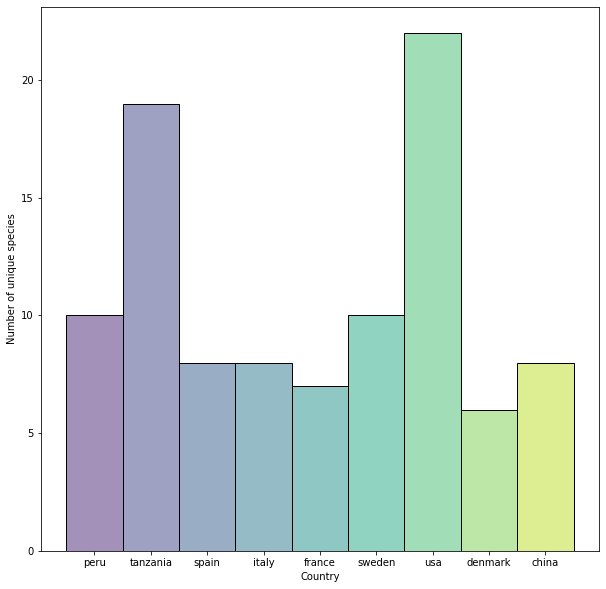

In [882]:
plt.figure(figsize=(10,10))

sns.histplot(endemic, x=ml, hue=ml, palette='viridis', legend=False)
#plt.legend(title='Country', loc='upper right', labels=['peru', 'tanzania', 'spain', 'italy', 'france', 'sweden', 'usa',
       #'denmark', 'china'].reverse())

plt.ylabel('Number of unique species')
plt.xlabel('Country')

In [1]:
# list of all species found in just one country
endemic_list=[i for i in endemic.species_name]

NameError: name 'endemic' is not defined

In [820]:
endemic_list

['s__Acidaminococcus_intestini',
 's__Klebsiella_unclassified',
 's__Lachnospiraceae_bacterium_5_1_63FAA',
 's__Lachnospiraceae_bacterium_7_1_58FAA',
 's__Lachnospiraceae_bacterium_8_1_57FAA',
 's__Lactobacillus_amylovorus',
 's__Lactobacillus_animalis',
 's__Helicobacter_pylori',
 's__Lactobacillus_antri',
 's__Lactobacillus_johnsonii',
 's__Lactobacillus_mucosae',
 's__Lactobacillus_reuteri',
 's__Lactobacillus_vaginalis',
 's__Lactococcus_lactis',
 's__Lautropia_mirabilis',
 's__Lactobacillus_fermentum',
 's__Lysinibacillus_sphaericus',
 's__Fusobacterium_ulcerans',
 's__Weissella_confusa',
 's__Clostridium_sp_KLE_1755',
 's__Clostridium_spiroforme',
 's__Collinsella_intestinalis',
 's__Collinsella_tanakaei',
 's__Corynebacterium_durum',
 's__Corynebacterium_matruchotii',
 's__Fusobacterium_gonidiaformans',
 's__Eggerthella_lenta',
 's__Enterococcus_hirae',
 's__Erysipelotrichaceae_bacterium_21_3',
 's__Escherichia_unclassified',
 's__Eubacterium_cylindroides',
 's__Eubacterium_limo

#### 6.3 Species that occur in more than one country but not all of them

In [836]:
in2=spec[spec['country','count']==2]

In [837]:
in2_list=[i for i in in2.species_name]

In [849]:
# create a dictionary to store lists for all species occurring in 2 to 8 countries
dict_={}
for i in range(2,9):
    dict_['in%s' % i]=spec[spec['country','count']==i]
    dict_['in%s' % i]=[i for i in dict_['in%s' % i].species_name]

In [850]:
dict_

{'in2': ['s__Bacteroides_salanitronis',
  's__Megasphaera_micronuciformis',
  's__Neisseria_unclassified',
  's__Veillonella_ratti',
  's__Odoribacter_laneus',
  's__Bacteroides_sp_1_1_6',
  's__Oscillibacter_sp_KLE_1745',
  's__Parabacteroides_distasonis',
  's__Parabacteroides_johnsonii',
  's__Streptococcus_salivarius',
  's__Peptostreptococcaceae_noname_unclassified',
  's__Prevotella_buccae',
  's__Bacteroides_fluxus',
  's__Treponema_succinifaciens',
  's__Bacteroides_finegoldii',
  's__Bacteroides_clarus',
  's__Rothia_mucilaginosa',
  's__Lactobacillus_salivarius',
  's__Ruminococcus_sp_JC304',
  's__Sutterella_wadsworthensis',
  's__Streptococcus_anginosus',
  's__Alistipes_sp_HGB5',
  's__Alistipes_shahii',
  's__Streptococcus_lutetiensis',
  's__Alistipes_onderdonkii',
  's__Parabacteroides_sp_20_3',
  's__Bacteroides_sp_3_2_5',
  's__Eubacterium_ventriosum',
  's__Dorea_unclassified',
  's__Bifidobacterium_angulatum',
  's__Desulfovibrio_piger',
  's__Enterococcus_faecalis'

#### 6.4 Are the top 5 species by abundance common or unique

In [869]:
top_5=pd.DataFrame(columns = ['country','species_name','abundance'])

for country in final.country.unique():
    top5 = (
        final[final['country'] == country].head(5)
    )
    top_5= pd.concat([top5, top_5])

top_5

,species_name,abundance,country
0,s__Prevotella_buccae,31.461740,usa
1,s__Pseudomonas_syringae,19.156250,usa
2,s__Bacteroides_sp_1_1_30,12.554115,usa
3,s__Rothia_dentocariosa,11.159190,usa
4,s__Prevotella_copri,9.742670,usa
0,s__Bifidobacterium_breve,13.774750,china
1,s__Prevotella_copri,13.360540,china
2,s__Prevotella_stercorea,8.767970,china
3,s__Bacteroides_coprophilus,6.323410,china
4,s__Cetobacterium_somerae,6.261145,china


In [864]:
def f(row):
    if row['species_name'] in common:
        val= 9
    elif row['species_name'] in endemic_list:
        val= 1
    elif row['species_name'] in dict_['in2']:
        val= 2
    elif row['species_name'] in dict_['in3']:
        val= 3
    elif row['species_name'] in dict_['in4']:
        val= 4
    elif row['species_name'] in dict_['in5']:
        val= 5
    elif row['species_name'] in dict_['in6']:
        val= 6
    elif row['species_name'] in dict_['in7']:
        val= 7
    elif row['species_name'] in dict_['in8']:
        val= 8
    return val

In [870]:
top_5['uniqueness'] = top_5.apply(f, axis=1)

In [871]:
top_5.groupby('country')[['uniqueness']].mean().sort_values('uniqueness',ascending=True)

,uniqueness
country,
usa,2.8
china,5.2
italy,5.2
peru,5.6
france,6.8
denmark,7.0
sweden,7.6
tanzania,7.6
spain,8.2


In [876]:
top_5

,species_name,abundance,country,uniqueness
0,s__Prevotella_buccae,31.461740,usa,2
1,s__Pseudomonas_syringae,19.156250,usa,1
2,s__Bacteroides_sp_1_1_30,12.554115,usa,1
3,s__Rothia_dentocariosa,11.159190,usa,1
4,s__Prevotella_copri,9.742670,usa,9
0,s__Bifidobacterium_breve,13.774750,china,3
1,s__Prevotella_copri,13.360540,china,9
2,s__Prevotella_stercorea,8.767970,china,7
3,s__Bacteroides_coprophilus,6.323410,china,6
4,s__Cetobacterium_somerae,6.261145,china,1


In [877]:
top_5.to_csv('top_5.csv', index=False)

##### The countries with more unique bacteria species in their top 5 by abundance are USA, China and Italy

##### Exporting final dataset for visualisations

In [610]:
final.to_csv('cleaned_country.csv', index=False)

## Exporting csv for clustering

In [725]:
cluster_ready=h_country.drop(['is_healthy', 'dataset_name', 'pubmedid','height','weight', 'bmi', 'disease'], axis=1)

In [726]:
# rename all bacteria columns
cluster_ready=cluster_ready.rename(columns={element: element.split('s__')[1] for element in cluster_ready.columns[4:]})

In [727]:
for e in ['subjectID', 'age', 'gender', 'country']:
    unique_list.append(e)

In [728]:
pattern = '|'.join(unique_list) # python 3.6 +

to_keep=[]
for c in cluster_ready.columns:
    if c in pattern:
        to_keep.append(c)


In [731]:
cluster_ready=cluster_ready[to_keep]

In [732]:
cluster_ready.to_csv('cluster_me.csv', index=False)

## COULD IT BE BECAUSE OF DIET DIFFERENCES???

Differences in microbiome between countries could be due to different causes:
1. diet or other environmental factors (antibiotics, lifestyle etc...)
1. genetics (inherited)
    
One way to we could explore whether the differences seen between countries are due to nature would be having data on ethicity on the individuals--> unfourtunately most studies included did not have such information
We can however look at diet and see if there are significant changes in diet in the countries where we have microbiome data

### 1. CAN I PREDICT COUNTRY BASED ON BACTERIA COMPOSITION??

YES!!

### 2. CAN I PREDICT country BASED ON DIETARY FEATURES??

NOT REALLY